# t-SNE Dimensionality Reduction
https://towardsdatascience.com/visualizing-feature-vectors-embeddings-using-pca-and-t-sne-ef157cea3a42

https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
%cd /content/drive/My Drive/multimodal/Multimodal Project/data
# %cd /content/drive/My Drive/Multimodal Projectx
#%cd /content/drive/My Drive/Shared with me/Multimodal Project

/content/drive/My Drive/multimodal/Multimodal Project/data


In [63]:
embeddings = np.load("image_embeddings_postpool.npy") # load the embeddings
embeddings = embeddings.reshape((len(embeddings), -1))

In [64]:
# Create a two dimensional t-SNE projection of the embeddings
tsne = TSNE(2, verbose=1, perplexity=80)  # may need to play around with the perplexity field in order to get the right patterns
tsne_proj = tsne.fit_transform(embeddings)
tsne_proj.shape


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.280s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 5.319814
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.073547
[t-SNE] KL divergence after 1000 iterations: 1.720970


(2000, 2)

In [65]:
y = np.load("labels.npy")
# y = y[:1000]

Plot t-SNE Results

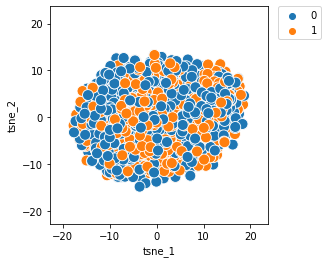

In [66]:
# Plot t-SNE projection 
tsne_proj_df = pd.DataFrame({'tsne_1': tsne_proj[:, 0], 'tsne_2': tsne_proj[:,1], 'label': y}) 
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_proj_df, ax=ax,s=120)
lim = (tsne_proj.min()-5, tsne_proj.max()+5) # change this***
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

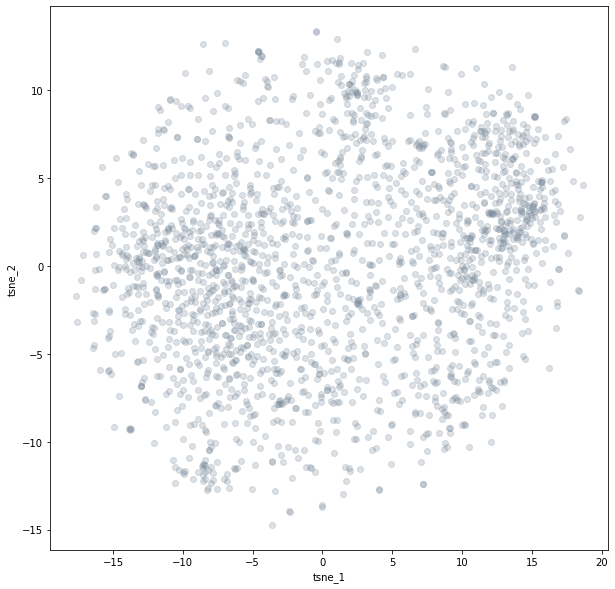

In [67]:
# Alternative plotting code for t-SNE projection
tsne_df_scale = pd.DataFrame(tsne_proj, columns=['tsne_1', 'tsne_2']) 

plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')
plt.show()

# K-Means Clustering on t-SNE Results
https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Text(0, 0.5, 'Inertia')

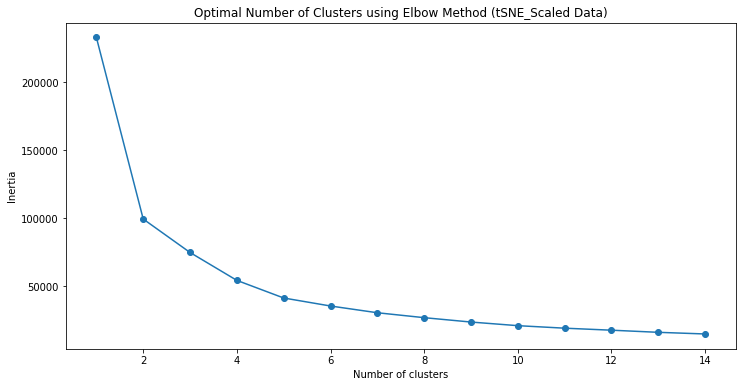

In [69]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [70]:
kmeans_tsne_scale = KMeans(n_clusters=2, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

KMeans tSNE Scaled Silhouette Score: 0.4885132312774658


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


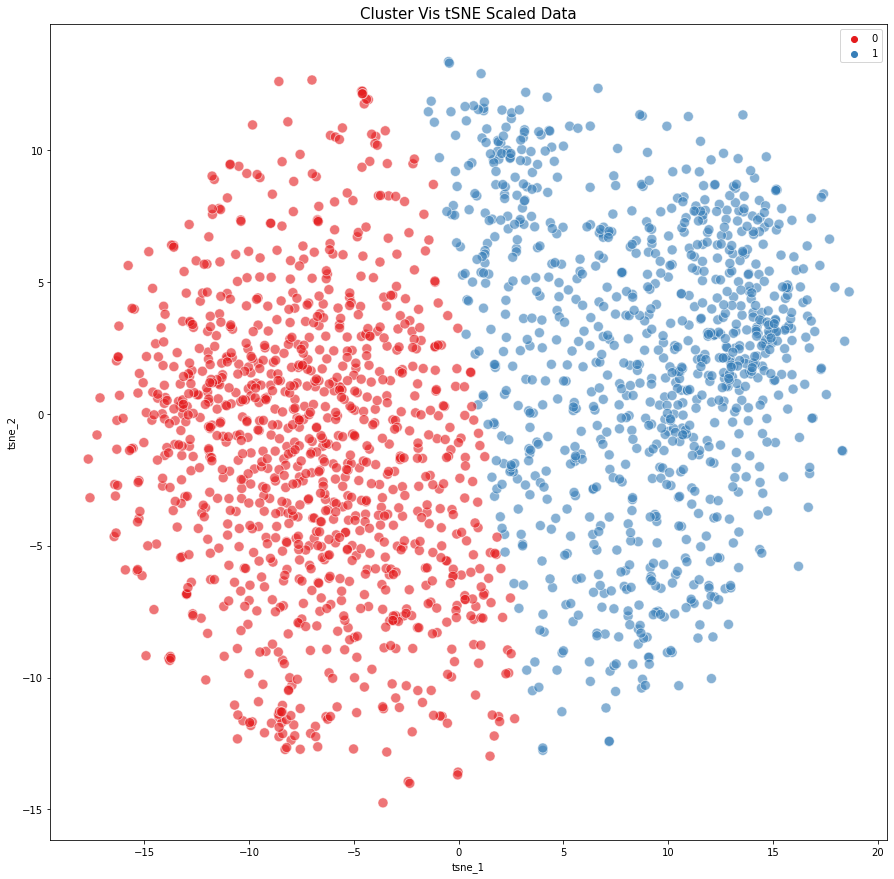

In [71]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vis tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [72]:
from google.colab import files
import json

labels_tsne_scale
labels_1 = []
labels_2 = []
labels_3 = []

for i in range(len(labels_tsne_scale)):
  if labels_tsne_scale[i] == 1:
    labels_1.append(i)
  elif labels_tsne_scale[i] == 2:
    labels_2.append(i)
  else:
    labels_3.append(i)
  
d = {
    "1": labels_1,
    "2": labels_2,
    "3": labels_3
}
f = open("image_cluster_indexes.json", "w")
json.dump(d, f)
f.close()
files.download('image_cluster_indexes.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>